In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/genres_v2.csv')


In [3]:
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539.0,4.0,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427.0,4.0,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821.0,4.0,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661.0,3.0,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298.0,4.0,Dark Trap,Venom,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29434 entries, 0 to 29433
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      29434 non-null  float64
 1   energy            29434 non-null  float64
 2   key               29434 non-null  int64  
 3   loudness          29434 non-null  float64
 4   mode              29434 non-null  int64  
 5   speechiness       29434 non-null  float64
 6   acousticness      29434 non-null  float64
 7   instrumentalness  29434 non-null  float64
 8   liveness          29434 non-null  float64
 9   valence           29434 non-null  float64
 10  tempo             29434 non-null  float64
 11  type              29434 non-null  object 
 12  id                29434 non-null  object 
 13  uri               29434 non-null  object 
 14  track_href        29434 non-null  object 
 15  analysis_url      29433 non-null  object 
 16  duration_ms       29433 non-null  float6

In [3]:
df=df.drop(['Unnamed: 0','id','uri','track_href','analysis_url','song_name','title','key','mode','time_signature'],axis=1)

In [4]:
df=df.dropna(axis=0)

In [7]:
print(df.head())

   danceability  energy  loudness  speechiness  acousticness  \
0         0.831   0.814    -7.364       0.4200        0.0598   
1         0.719   0.493    -7.230       0.0794        0.4010   
2         0.850   0.893    -4.783       0.0623        0.0138   
3         0.476   0.781    -4.710       0.1030        0.0237   
4         0.798   0.624    -7.668       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo            type  duration_ms  \
0          0.013400    0.0556   0.3890  156.985  audio_features     124539.0   
1          0.000000    0.1180   0.1240  115.080  audio_features     224427.0   
2          0.000004    0.3720   0.0391  218.050  audio_features      98821.0   
3          0.000000    0.1140   0.1750  186.948  audio_features     123661.0   
4          0.000000    0.1660   0.5910  147.988  audio_features     123298.0   

       genre  
0  Dark Trap  
1  Dark Trap  
2  Dark Trap  
3  Dark Trap  
4  Dark Trap  


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
df['type']=le.fit_transform(df['type'])

In [7]:
df['genre']=le.fit_transform(df['genre'])

In [11]:
print(df)

       danceability  energy  loudness  speechiness  acousticness  \
0             0.831   0.814    -7.364       0.4200      0.059800   
1             0.719   0.493    -7.230       0.0794      0.401000   
2             0.850   0.893    -4.783       0.0623      0.013800   
3             0.476   0.781    -4.710       0.1030      0.023700   
4             0.798   0.624    -7.668       0.2930      0.217000   
...             ...     ...       ...          ...           ...   
29428         0.590   0.961    -6.809       0.0897      0.004820   
29429         0.638   0.992    -6.414       0.1450      0.000234   
29430         0.460   0.950    -8.127       0.0734      0.000490   
29431         0.495   0.969    -6.140       0.0482      0.000153   
29432         0.562   0.899    -5.230       0.0429      0.000457   

       instrumentalness  liveness  valence    tempo  type  duration_ms  genre  
0              0.013400    0.0556   0.3890  156.985     0     124539.0      0  
1              0.000000

In [12]:
x=df.iloc[:,[0,1]].values

In [13]:
print(x)

[[0.831 0.814]
 [0.719 0.493]
 [0.85  0.893]
 ...
 [0.46  0.95 ]
 [0.495 0.969]
 [0.562 0.899]]


In [14]:
print(x.shape)

(29433, 2)


# KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

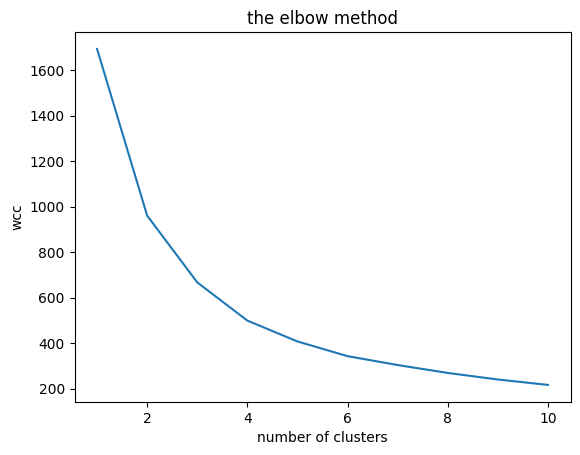

In [15]:
from sklearn.cluster import KMeans
wcc=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init='k-means++',random_state=42)
  km.fit(x)
  wcc.append(km.inertia_)
plt.plot(range(1,11),wcc)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcc')
plt.show()

In [16]:
km=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_hat=km.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
print(x)

[[0.831 0.814]
 [0.719 0.493]
 [0.85  0.893]
 ...
 [0.46  0.95 ]
 [0.495 0.969]
 [0.562 0.899]]


In [18]:
print(y_hat)

[0 3 0 ... 2 2 2]


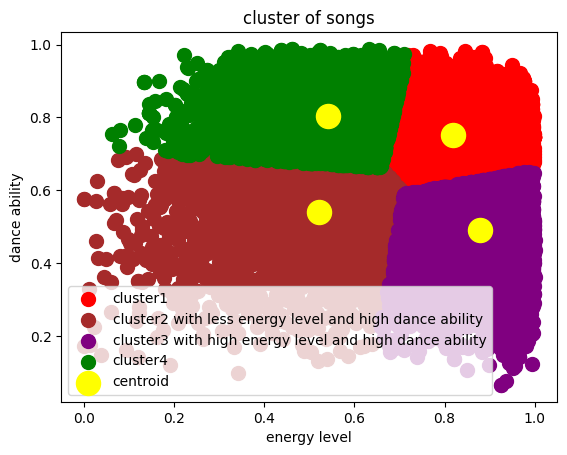

In [19]:
plt.scatter(x[y_hat==0,1],x[y_hat==0,0],s=100,c='red',label='cluster1')
plt.scatter(x[y_hat==1,1],x[y_hat==1,0],s=100,c='brown',label='cluster2 with less energy level and high dance ability')
plt.scatter(x[y_hat==2,1],x[y_hat==2,0],s=100,c='purple',label='cluster3 with high energy level and high dance ability')
plt.scatter(x[y_hat==3,1],x[y_hat==3,0],s=100,c='green',label='cluster4')
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,0],s=300,c='yellow',label='centroid')
plt.title('cluster of songs')
plt.xlabel('energy level')
plt.ylabel('dance ability')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
silhouette_score_kmeans = round(silhouette_score(x, y_hat), 2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(x, y_hat), 2)

In [21]:
print(silhouette_score_kmeans)
print(calinski_harabasz_score_kmeans)

0.38
23439.3


# hierarchical

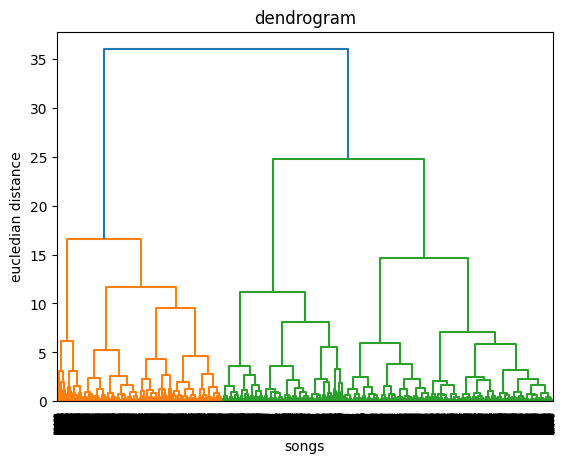

In [22]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('dendrogram')
plt.xlabel('songs')
plt.ylabel('eucledian distance')
plt.show()

In [24]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [25]:
print(y_hc)

[1 0 1 ... 2 2 2]


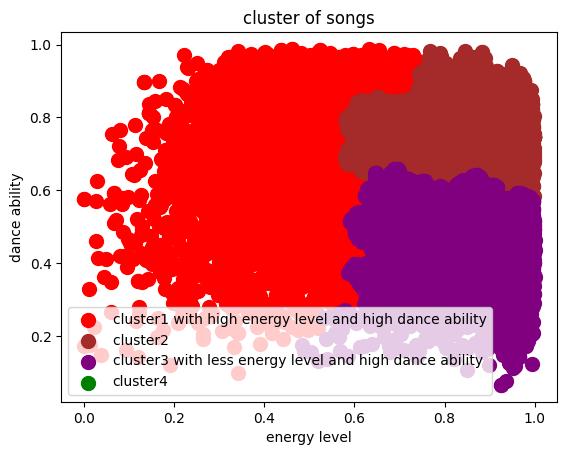

In [26]:
plt.scatter(x[y_hc==0,1],x[y_hc==0,0],s=100,c='red',label='cluster1 with high energy level and high dance ability')
plt.scatter(x[y_hc==1,1],x[y_hc==1,0],s=100,c='brown',label='cluster2 ')
plt.scatter(x[y_hc==2,1],x[y_hc==2,0],s=100,c='purple',label='cluster3 with less energy level and high dance ability')
plt.scatter(x[y_hc==3,1],x[y_hc==3,0],s=100,c='green',label='cluster4')
plt.title('cluster of songs')
plt.xlabel('energy level')
plt.ylabel('dance ability')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
silhouette_score_hc = round(silhouette_score(x, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(x, y_hc), 2)

In [28]:
print(silhouette_score_hc)
print(calinski_harabasz_score_hc)

0.33
19103.46


#Summary
Silhouette Score: Improved from 0.32 to 0.35, indicating that k-means clustering produces slightly better-defined clusters.

Calinski-Harabasz Score: Improved from 2036.23 to 2326.09, indicating that k-means clustering results in clusters that are more compact and well-separated.

# based on loudness and dance ability

In [36]:
x1=df.iloc[:,[1,2]].values

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x1=sc.fit_transform(x1)

In [39]:
print(x1)

[[ 0.814 -7.364]
 [ 0.493 -7.23 ]
 [ 0.893 -4.783]
 ...
 [ 0.95  -8.127]
 [ 0.969 -6.14 ]
 [ 0.899 -5.23 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

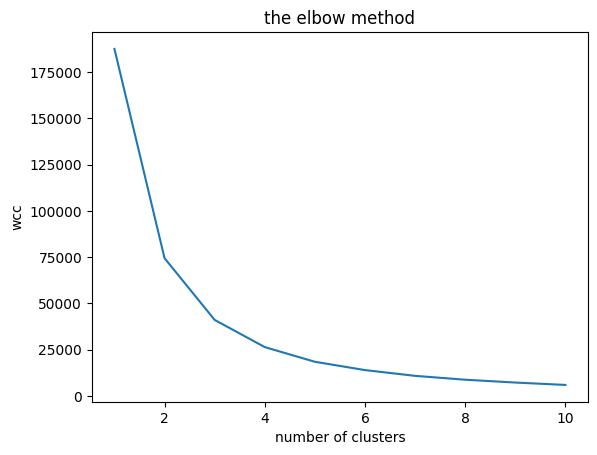

In [96]:
from sklearn.cluster import KMeans
wcc=[]
for i in range(1,11):
  km=KMeans(n_clusters=i,init='k-means++',random_state=42)
  km.fit(x1)
  wcc.append(km.inertia_)
plt.plot(range(1,11),wcc)
plt.title('the elbow method')
plt.xlabel('number of clusters')
plt.ylabel('wcc')
plt.show()

In [97]:
km=KMeans(n_clusters=4,init='k-means++',random_state=42)
y_hat=km.fit_predict(x1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


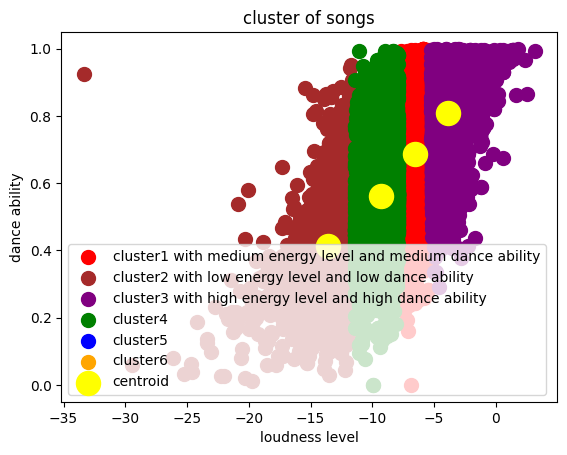

In [98]:
plt.scatter(x1[y_hat==0,1],x1[y_hat==0,0],s=100,c='red',label='cluster1 with medium energy level and medium dance ability')
plt.scatter(x1[y_hat==1,1],x1[y_hat==1,0],s=100,c='brown',label='cluster2 with low energy level and low dance ability')
plt.scatter(x1[y_hat==2,1],x1[y_hat==2,0],s=100,c='purple',label='cluster3 with high energy level and high dance ability')
plt.scatter(x1[y_hat==3,1],x1[y_hat==3,0],s=100,c='green',label='cluster4')
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,0],s=300,c='yellow',label='centroid')
plt.title('cluster of songs')
plt.xlabel('loudness level')
plt.ylabel('dance ability')
plt.legend()
plt.show()

In [35]:
print(x1)

[[ 0.5952188  -0.03689703]
 [-1.15514504  0.01076351]
 [ 1.0259937   0.88110191]
 ...
 [ 1.33680598 -0.30827758]
 [ 1.44041007  0.39845001]
 [ 1.05871079  0.72211488]]


In [99]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
silhouette_score_hc = round(silhouette_score(x1, y_hat), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(x1, y_hat), 2)

In [100]:
print(silhouette_score_hc)
print(calinski_harabasz_score_hc)

0.51
46516.27


In [42]:
print(0.5+0.5)

1.0


In [45]:
print(y_hat)

       0
0      0
1      0
2      2
3      2
4      0
...   ..
22874  2
22875  0
22876  0
22877  0
22878  2

[22879 rows x 1 columns]


# hierarchy 2

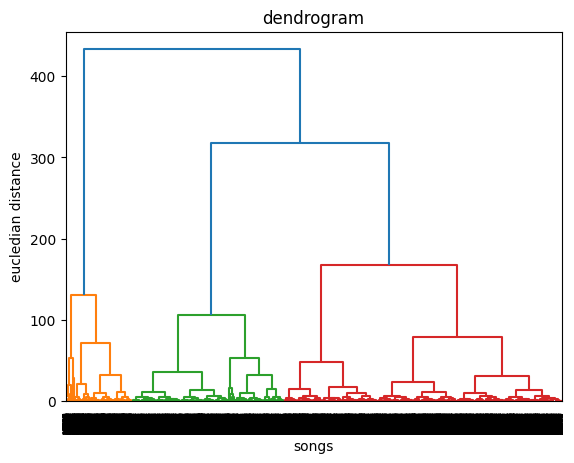

In [63]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x1,method='ward'))
plt.title('dendrogram')
plt.xlabel('songs')
plt.ylabel('eucledian distance')
plt.show()

In [109]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


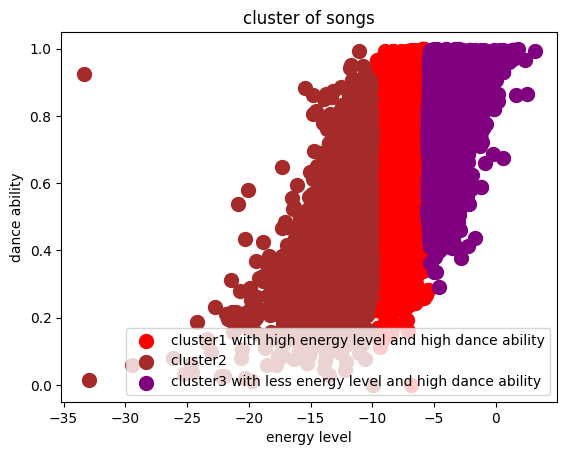

In [110]:
plt.scatter(x1[y_hc==0,1],x1[y_hc==0,0],s=100,c='red',label='cluster1 with high energy level and high dance ability')
plt.scatter(x1[y_hc==1,1],x1[y_hc==1,0],s=100,c='brown',label='cluster2 ')
plt.scatter(x1[y_hc==2,1],x1[y_hc==2,0],s=100,c='purple',label='cluster3 with less energy level and high dance ability')
plt.title('cluster of songs')
plt.xlabel('energy level')
plt.ylabel('dance ability')
plt.legend()
plt.show()

In [111]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
silhouette_score_hc = round(silhouette_score(x1, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(x1, y_hc), 2)

In [112]:
print(silhouette_score_hc)
print(calinski_harabasz_score_hc)

0.5
37837.45


# Hence we know that kmeans provide more perfection as compared to hierarchical ,so we clusters the songs based on kmeans

In [113]:
y_hat=pd.DataFrame(y_hat)

In [114]:
df1=pd.read_csv('/content/genres_v2.csv')

<ipython-input-114-363aa4afe6ad>:1: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('/content/genres_v2.csv')


In [115]:
df1['predicted']=y_hat

**Link for the songs with less sound and dance ability which prefer for peace of entertainment**

In [116]:
filtered_df1=df1[df1['predicted']==1.0]
print(f"Songs with less sound and dance ability{filtered_df1[['uri','predicted']]}")

Songs with less sound and dance ability                                        uri  predicted
16     spotify:track:28xkYPSP0P5xu5vT6MQfCy        1.0
29     spotify:track:2AoJ1NSLrqfppo6oT5Bqc8        1.0
32     spotify:track:2bmSQxuradc103RXzvjTkE        1.0
33     spotify:track:2Tu4kHEeIVFn6Re2ybm2lQ        1.0
36     spotify:track:02803el8p3mKqcJzJ3Agpp        1.0
...                                     ...        ...
22372  spotify:track:4szwPQ7ajXpyqykjtv6RLE        1.0
22377  spotify:track:153g5e4MEDxNZLAl1r7gIw        1.0
22447  spotify:track:3td29Dh0RYTCx0LqIJz5Hj        1.0
22556  spotify:track:06wwpYseFcMIcWDdB7aJ5b        1.0
22791  spotify:track:7aqnbNAAVjFwgWZMuMNDcS        1.0

[1600 rows x 2 columns]


**Link for the songs with high sound and dance ability which prefer for high of entertainment**

In [117]:
filtered_df = df1[df1['predicted'] == 2.0]
print(f" Songs with high loudness and dance ability{filtered_df[['uri', 'predicted']]}")


 Songs with high loudness and dance ability                                        uri  predicted
2      spotify:track:0vSWgAlfpye0WCGeNmuNhy        2.0
3      spotify:track:0VSXnJqQkwuH2ei1nOQ1nu        2.0
6      spotify:track:0XfQbq7DaMOmVXgQ71eA6E        2.0
8      spotify:track:37gqBnUAZe8BY8WR56kDNk        2.0
11     spotify:track:0QiF3l617bIKVrkBqgdMHE        2.0
...                                     ...        ...
22852  spotify:track:7nevWTV487nFy8lypwy5ha        2.0
22857  spotify:track:1vdFJKI0DyEQqExRoLLceB        2.0
22858  spotify:track:3wcmG3AHn9INTNiph0BqBb        2.0
22874  spotify:track:4nzUclEJiSUwQQcCCEbNAA        2.0
22878  spotify:track:2C6HOUzvpWxp7SrPZ3UNUX        2.0

[6091 rows x 2 columns]
